In [161]:
import numpy as np
import pandas as pd
import whatstk
import re


In [162]:
from whatstk import df_from_txt_whatsapp
from whatstk.data import whatsapp_urls
df = df_from_txt_whatsapp(filepath="WhatsApp Chat with Disciples of nagamani akka.txt")


In [163]:
df.head()

,date,username,message
0,2024-01-23 08:08:00,Keerthana Vit,Hello
1,2024-01-23 08:09:00,Madhu Vit,Hello
2,2024-01-23 08:09:00,Madhu Vit,Aam tinnara
3,2024-01-23 08:09:00,Madhu Vit,😂
4,2024-01-23 08:09:00,Keerthana Vit,Ha dinner completed


In [164]:
df['Date'] = df['date'].dt.date
df['Time'] = df['date'].dt.strftime("%H:%M:%S")

In [165]:
df.head()

,date,username,message,Date,Time
0,2024-01-23 08:08:00,Keerthana Vit,Hello,2024-01-23,08:08:00
1,2024-01-23 08:09:00,Madhu Vit,Hello,2024-01-23,08:09:00
2,2024-01-23 08:09:00,Madhu Vit,Aam tinnara,2024-01-23,08:09:00
3,2024-01-23 08:09:00,Madhu Vit,😂,2024-01-23,08:09:00
4,2024-01-23 08:09:00,Keerthana Vit,Ha dinner completed,2024-01-23,08:09:00


In [166]:
df.drop("date",axis=1,inplace=True)

In [167]:
df.head()

,username,message,Date,Time
0,Keerthana Vit,Hello,2024-01-23,08:08:00
1,Madhu Vit,Hello,2024-01-23,08:09:00
2,Madhu Vit,Aam tinnara,2024-01-23,08:09:00
3,Madhu Vit,😂,2024-01-23,08:09:00
4,Keerthana Vit,Ha dinner completed,2024-01-23,08:09:00


In [168]:
import pandas as pd
import re
# Function to split the message and emoji
def split_text(text):
    # Regular expression to match emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    
    # Find all emojis in the text
    emojis = emoji_pattern.findall(text)
    
    # Remove emojis from the text
    message = emoji_pattern.sub(r'', text).strip()
    
    # Join all found emojis into a single string
    emoji_string = ''.join(emojis)
    
    return message, emoji_string

# Apply the split_text function to the 'message' column
df[['message_clean', 'emoji']] = df['message'].apply(lambda x: pd.Series(split_text(x)))

# Display the DataFrame
print(df)


          username                                            message  \
0    Keerthana Vit                                              Hello   
1        Madhu Vit                                              Hello   
2        Madhu Vit                                        Aam tinnara   
3        Madhu Vit                                                  😂   
4    Keerthana Vit                                Ha dinner completed   
..             ...                                                ...   
725    Kashyap Vit                                             Herooo   
726    Kashyap Vit                                           Material   
727  Keerthana Vit                                            Ntg mch   
728    Kashyap Vit                                    <Media omitted>   
729    Lasya Vit🤗🤗  nptl courses last date eppudu??
05/07/2024, 10...   

           Date      Time                                      message_clean  \
0    2024-01-23  08:08:00                  

In [169]:
df.head()

,username,message,Date,Time,message_clean,emoji
0,Keerthana Vit,Hello,2024-01-23,08:08:00,Hello,
1,Madhu Vit,Hello,2024-01-23,08:09:00,Hello,
2,Madhu Vit,Aam tinnara,2024-01-23,08:09:00,Aam tinnara,
3,Madhu Vit,😂,2024-01-23,08:09:00,,😂
4,Keerthana Vit,Ha dinner completed,2024-01-23,08:09:00,Ha dinner completed,


In [170]:
df.head(10)

,username,message,Date,Time,message_clean,emoji
0,Keerthana Vit,Hello,2024-01-23,08:08:00,Hello,
1,Madhu Vit,Hello,2024-01-23,08:09:00,Hello,
2,Madhu Vit,Aam tinnara,2024-01-23,08:09:00,Aam tinnara,
3,Madhu Vit,😂,2024-01-23,08:09:00,,😂
4,Keerthana Vit,Ha dinner completed,2024-01-23,08:09:00,Ha dinner completed,
5,Madhu Vit,Dinner ❌ aam ✔️,2024-01-23,08:10:00,Dinner ❌ aam ✔️,
6,Keerthana Vit,Ohh adaa,2024-01-23,08:10:00,Ohh adaa,
7,Keerthana Vit,Ippudu ardam ayindi,2024-01-23,08:10:00,Ippudu ardam ayindi,
8,Madhu Vit,😂,2024-01-23,08:10:00,,😂
9,Keerthana Vit,Typo mistake anukunna,2024-01-23,08:10:00,Typo mistake anukunna,


In [171]:
df.drop("message",axis=1,inplace=True)

In [172]:
df.head(10)

,username,Date,Time,message_clean,emoji
0,Keerthana Vit,2024-01-23,08:08:00,Hello,
1,Madhu Vit,2024-01-23,08:09:00,Hello,
2,Madhu Vit,2024-01-23,08:09:00,Aam tinnara,
3,Madhu Vit,2024-01-23,08:09:00,,😂
4,Keerthana Vit,2024-01-23,08:09:00,Ha dinner completed,
5,Madhu Vit,2024-01-23,08:10:00,Dinner ❌ aam ✔️,
6,Keerthana Vit,2024-01-23,08:10:00,Ohh adaa,
7,Keerthana Vit,2024-01-23,08:10:00,Ippudu ardam ayindi,
8,Madhu Vit,2024-01-23,08:10:00,,😂
9,Keerthana Vit,2024-01-23,08:10:00,Typo mistake anukunna,


In [173]:
df = df.drop(df.index[0])

In [174]:
df.head(10)

,username,Date,Time,message_clean,emoji
1,Madhu Vit,2024-01-23,08:09:00,Hello,
2,Madhu Vit,2024-01-23,08:09:00,Aam tinnara,
3,Madhu Vit,2024-01-23,08:09:00,,😂
4,Keerthana Vit,2024-01-23,08:09:00,Ha dinner completed,
5,Madhu Vit,2024-01-23,08:10:00,Dinner ❌ aam ✔️,
6,Keerthana Vit,2024-01-23,08:10:00,Ohh adaa,
7,Keerthana Vit,2024-01-23,08:10:00,Ippudu ardam ayindi,
8,Madhu Vit,2024-01-23,08:10:00,,😂
9,Keerthana Vit,2024-01-23,08:10:00,Typo mistake anukunna,
10,Kashyap Vit,2024-01-23,08:11:00,<Media omitted>,


In [175]:

def extract_urls(text):
    url_pattern = r'https?://\S+'
    return re.findall(url_pattern, text)

# Apply the function to each row in the 'message' column
df['urls'] = df['message_clean'].apply(extract_urls)

print(df)


          username        Date      Time  \
1        Madhu Vit  2024-01-23  08:09:00   
2        Madhu Vit  2024-01-23  08:09:00   
3        Madhu Vit  2024-01-23  08:09:00   
4    Keerthana Vit  2024-01-23  08:09:00   
5        Madhu Vit  2024-01-23  08:10:00   
..             ...         ...       ...   
725    Kashyap Vit  2024-06-27  12:30:00   
726    Kashyap Vit  2024-06-27  12:30:00   
727  Keerthana Vit  2024-06-27  01:16:00   
728    Kashyap Vit  2024-06-27  01:30:00   
729    Lasya Vit🤗🤗  2024-07-04  05:48:00   

                                         message_clean emoji urls  
1                                                Hello         []  
2                                          Aam tinnara         []  
3                                                          😂   []  
4                                  Ha dinner completed         []  
5                                      Dinner ❌ aam ✔️         []  
..                                                 ...   ...  .

In [176]:
df.head()

,username,Date,Time,message_clean,emoji,urls
1,Madhu Vit,2024-01-23,08:09:00,Hello,,[]
2,Madhu Vit,2024-01-23,08:09:00,Aam tinnara,,[]
3,Madhu Vit,2024-01-23,08:09:00,,😂,[]
4,Keerthana Vit,2024-01-23,08:09:00,Ha dinner completed,,[]
5,Madhu Vit,2024-01-23,08:10:00,Dinner ❌ aam ✔️,,[]


In [177]:
df.shape

(729, 6)

In [178]:
total_messages = df.shape[0]
print(total_messages)

729


In [179]:
emojis = sum(df['emoji'].str.len()) 
print(emojis)

172


In [180]:
urls = sum(df['urls'].str.len()) 
print(urls)

0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 1 to 729
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       729 non-null    string
 1   Date           729 non-null    object
 2   Time           729 non-null    object
 3   message_clean  729 non-null    object
 4   emoji          729 non-null    object
 5   urls           729 non-null    object
dtypes: object(5), string(1)
memory usage: 39.9+ KB


In [182]:
df['Letter_Count'] = df['message_clean'].apply(lambda s : len(s))
df['Word_Count'] = df['message_clean'].apply(lambda s : len(s.split(' '))) #word is calculated by spliting sentence by whitespace
df["MessageCount"]=1

In [183]:
df.head()

,username,Date,Time,message_clean,emoji,urls,Letter_Count,Word_Count,MessageCount
1,Madhu Vit,2024-01-23,08:09:00,Hello,,[],5,1,1
2,Madhu Vit,2024-01-23,08:09:00,Aam tinnara,,[],11,2,1
3,Madhu Vit,2024-01-23,08:09:00,,😂,[],0,1,1
4,Keerthana Vit,2024-01-23,08:09:00,Ha dinner completed,,[],19,3,1
5,Madhu Vit,2024-01-23,08:10:00,Dinner ❌ aam ✔️,,[],15,4,1


In [184]:
frnds = df.username.unique()

for i in range(len(frnds)):
  # Filtering out messages of particular user
  req_df=df[df["username"] == frnds[i]]
  # req_df will contain messages of only one particular user
  print(" ")
  print(f'Stats of {frnds[i]} -')
  
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = df[df['username'] == frnds[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  

 
Stats of Madhu Vit -
Messages Sent 103
Words per message 4.543689320388349
Media Messages Sent 103
Emojis Sent 24
 
Stats of Keerthana Vit -
Messages Sent 110
Words per message 4.6
Media Messages Sent 110
Emojis Sent 6
 
Stats of Kashyap Vit -
Messages Sent 239
Words per message 6.640167364016737
Media Messages Sent 239
Emojis Sent 75
 
Stats of Ratna Akshitha Manchikant -
Messages Sent 114
Words per message 3.43859649122807
Media Messages Sent 114
Emojis Sent 35
 
Stats of Aahil Vit -
Messages Sent 122
Words per message 4.877049180327869
Media Messages Sent 122
Emojis Sent 8
 
Stats of Lasya Vit🤗🤗 -
Messages Sent 41
Words per message 24.51219512195122
Media Messages Sent 41
Emojis Sent 24


In [185]:
total_emojis_list = list(set([a for b in df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

31


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Time')

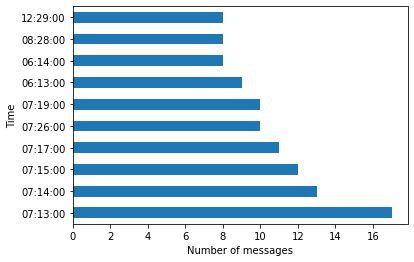

In [186]:
df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')